In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (24, 16)
import seaborn as sns
import os
from datetime import datetime

In [2]:
def import_files(path):
    file_dfs = {}
    for subject_type in os.listdir(path):
        for subject_ID in os.listdir(f"{path}/{subject_type}"):
            file_dfs[f"{subject_type}_{subject_ID}"] = {}
            for day in os.listdir(f"{path}/{subject_type}/{subject_ID}/sensor_data"):
                try:
                    df = pd.read_csv(f"{path}/{subject_type}/{subject_ID}/sensor_data/{day}/{day}_Summary.csv")
                    df["Time"] = pd.to_datetime(df["Time"], format="%d/%m/%Y %H:%M:%S.%f")
                    file_dfs[f"{subject_type}_{subject_ID}"][f"{day}"] = df
                except FileNotFoundError:
                    pass

    return file_dfs

In [3]:
def round_time(time):
    
    hour = time.hour
    minute = time.minute
    return hour + int(np.round(minute / 60))

def hours_worn(start_time, end_time):
    
    total_time = end_time - start_time
    if total_time.components[0]  != 0:
        print(f"User wore sensor for {total_time.components[0]} day(s)")
        print(f"{start_time}, {end_time}")
    return  total_time.components[1] + (total_time.components[1] /60) 

In [4]:
def plot_boxplot(df, title, ylabel="Subject ID", xlabel="Hours"):
    fontdict = {"fontsize":40}
    plt.title(title)
    plt.title(title,fontdict)
    plt.ylabel(ylabel,fontdict)
    plt.xlabel(xlabel,fontdict)
    sns.boxplot(data=df, width = 0.5,orient="horizontal",) 
    
def plot_subjects(df,colName, title, xlabel):   
    fontdict = {"fontsize":20}
    plt.barh(df.index, df[colName],)
    plt.title(title,fontdict)
    plt.ylabel('Subject ID',fontdict)
    plt.xlabel(xlabel,fontdict)
    plt.show()

## Import data

In [5]:
path = "data/processed_data"
dfs = import_files(path)

#### Example dataset for one subject for one day

The dataset is summary of various sensor that D1NAMO measured.  
The orginal data was taken at 100 times a second but the *_Summary.csv dataset  
was resampled to once a second, which will hopefully make the data more manageable.  

The dataset contains 35 columns as seen below.
All the columns excluding Time are either dtype int or float.

The example below has no Null values but I am not certain if that is true for all dataframes.

In [6]:
dfs["diabetes_subset_001"]["2014_10_01-10_09_39"].describe().astype(int).T

,count,mean,std,min,25%,50%,75%,max
HR,44027,67,34,0,63,74,89,180
BR,44027,16,5,2,12,16,21,52
SkinTemp,44027,-3276,0,-3276,-3276,-3276,-3276,-3276
Posture,44027,-18,20,-124,-26,-21,-14,124
Activity,44027,0,0,0,0,0,0,1
PeakAccel,44027,0,0,0,0,0,0,7
BatteryVolts,44027,3,0,3,3,3,4,4
BatteryLevel,44027,56,18,30,39,55,73,93
BRAmplitude,44027,32,83,2,10,16,34,5973
BRNoise,44027,65535,0,65535,65535,65535,65535,65535


In [7]:
dfs["diabetes_subset_001"]["2014_10_01-10_09_39"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44027 entries, 0 to 44026
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Time              44027 non-null  datetime64[ns]
 1   HR                44027 non-null  int64         
 2   BR                44027 non-null  float64       
 3   SkinTemp          44027 non-null  float64       
 4   Posture           44027 non-null  int64         
 5   Activity          44027 non-null  float64       
 6   PeakAccel         44027 non-null  float64       
 7   BatteryVolts      44027 non-null  float64       
 8   BatteryLevel      44027 non-null  int64         
 9   BRAmplitude       44027 non-null  float64       
 10  BRNoise           44027 non-null  float64       
 11  BRConfidence      44027 non-null  int64         
 12  ECGAmplitude      44027 non-null  float64       
 13  ECGNoise          44027 non-null  float64       
 14  HRConfidence      4402

In [8]:
subject_stats = {}

for key in dfs:
    subject_stats[key] = {}
    subject_stats[key]["date"] = []
    subject_stats[key]["start_hour"] = []
    subject_stats[key]["end_hour"] = []
    subject_stats[key]["total_time"] = []
    for day in dfs[key]:
        df = dfs[key][day]
        


        date = str(df["Time"][0].date())
        start_time = df["Time"][0]
        end_time = df["Time"].iloc[-1]
    
        subject_stats[key]["date"].append(date)
        subject_stats[key]["start_hour"].append(round_time(start_time))
        subject_stats[key]["end_hour"].append(round_time(end_time))
        subject_stats[key]["total_time"].append(hours_worn(start_time, end_time))

In [9]:
subject_stats = []

for key in dfs:
    target = 1 if key.split("_")[0] == "diabetes" else 0
    for day in dfs[key]:
 
        current_row = []
        df = dfs[key][day]
        date = str(df["Time"][0].date())
        start_time = df["Time"][0]
        end_time = df["Time"].iloc[-1]
        current_row.append(key)
        current_row.append(date)
        current_row.append(round_time(start_time))
        current_row.append(round_time(end_time))
        current_row.append(hours_worn(start_time, end_time))
        current_row.append(target)
        subject_stats.append(current_row)

In [10]:
subject_stats_df = pd.DataFrame(subject_stats, 
        columns=["subjectID","date","start_time(hour)","end_time(hour)","total_time(hours)", "target"])

C:\Users\PC\AppData\Local\Temp\ipykernel_13924\560878938.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_subjects(subject_stats_df.groupby("subjectID").sum(),"total_time(hours)", "Total Hours Measured", "Hours")


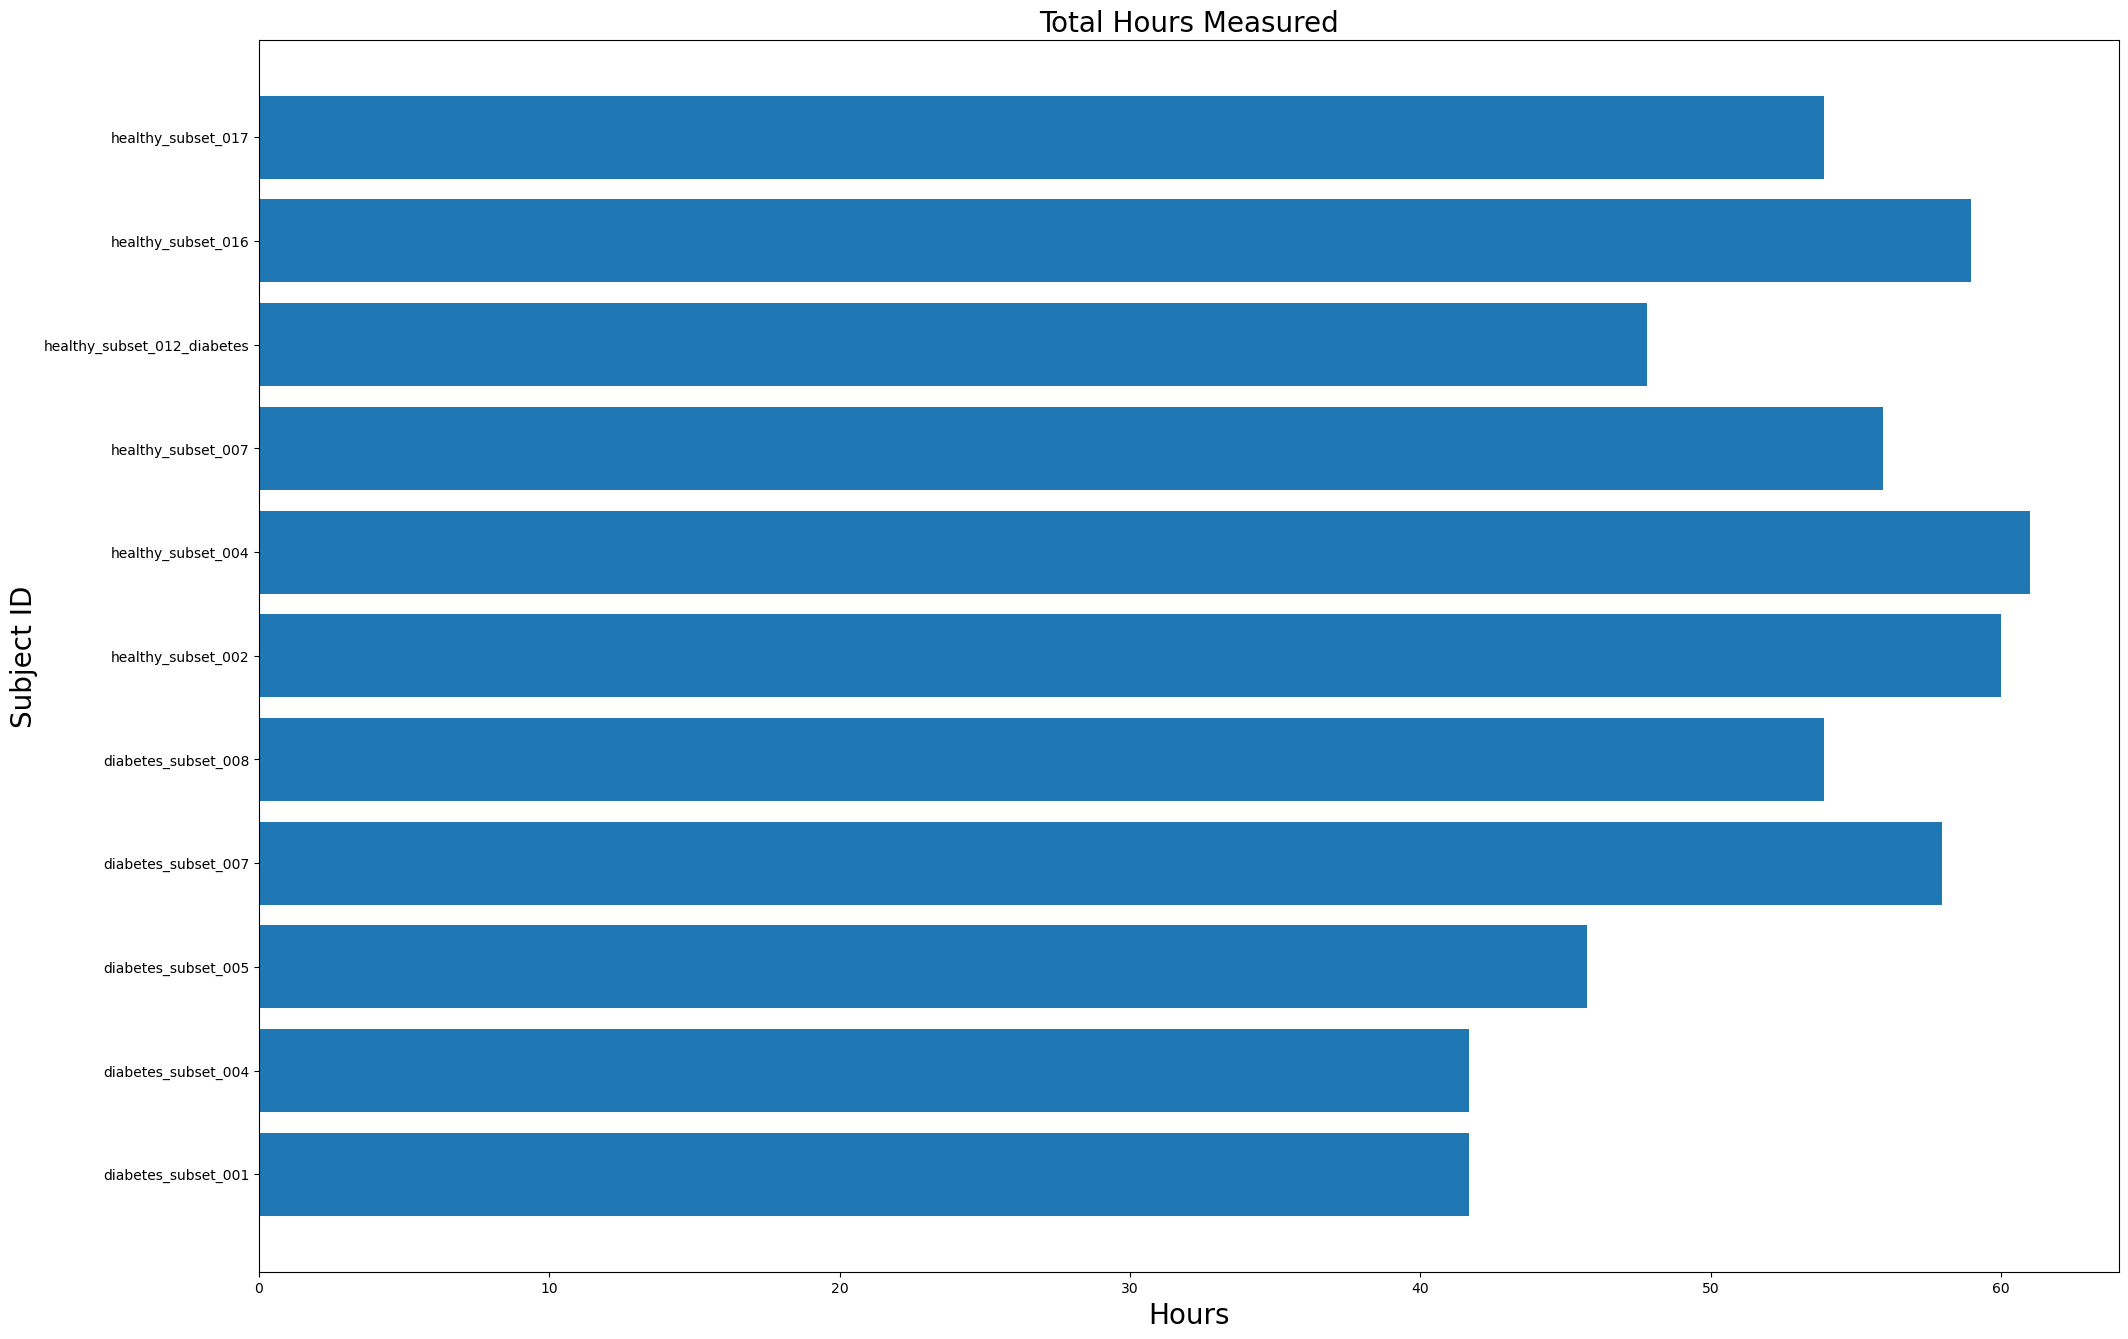

In [11]:
plot_subjects(subject_stats_df.groupby("subjectID").sum(),"total_time(hours)", "Total Hours Measured", "Hours")

In [12]:
subject_stats_df.groupby("subjectID")[["total_time(hours)"]].sum().describe()

,total_time(hours)
count,11.000000
mean,52.589394
std,7.190226
min,41.683333
25%,46.766667
50%,53.883333
75%,58.458333
max,61.000000


The total hours measured by subjects range from 40+ hours up to 61 hours.  
On average each subject created 13 hours worth of data per day.

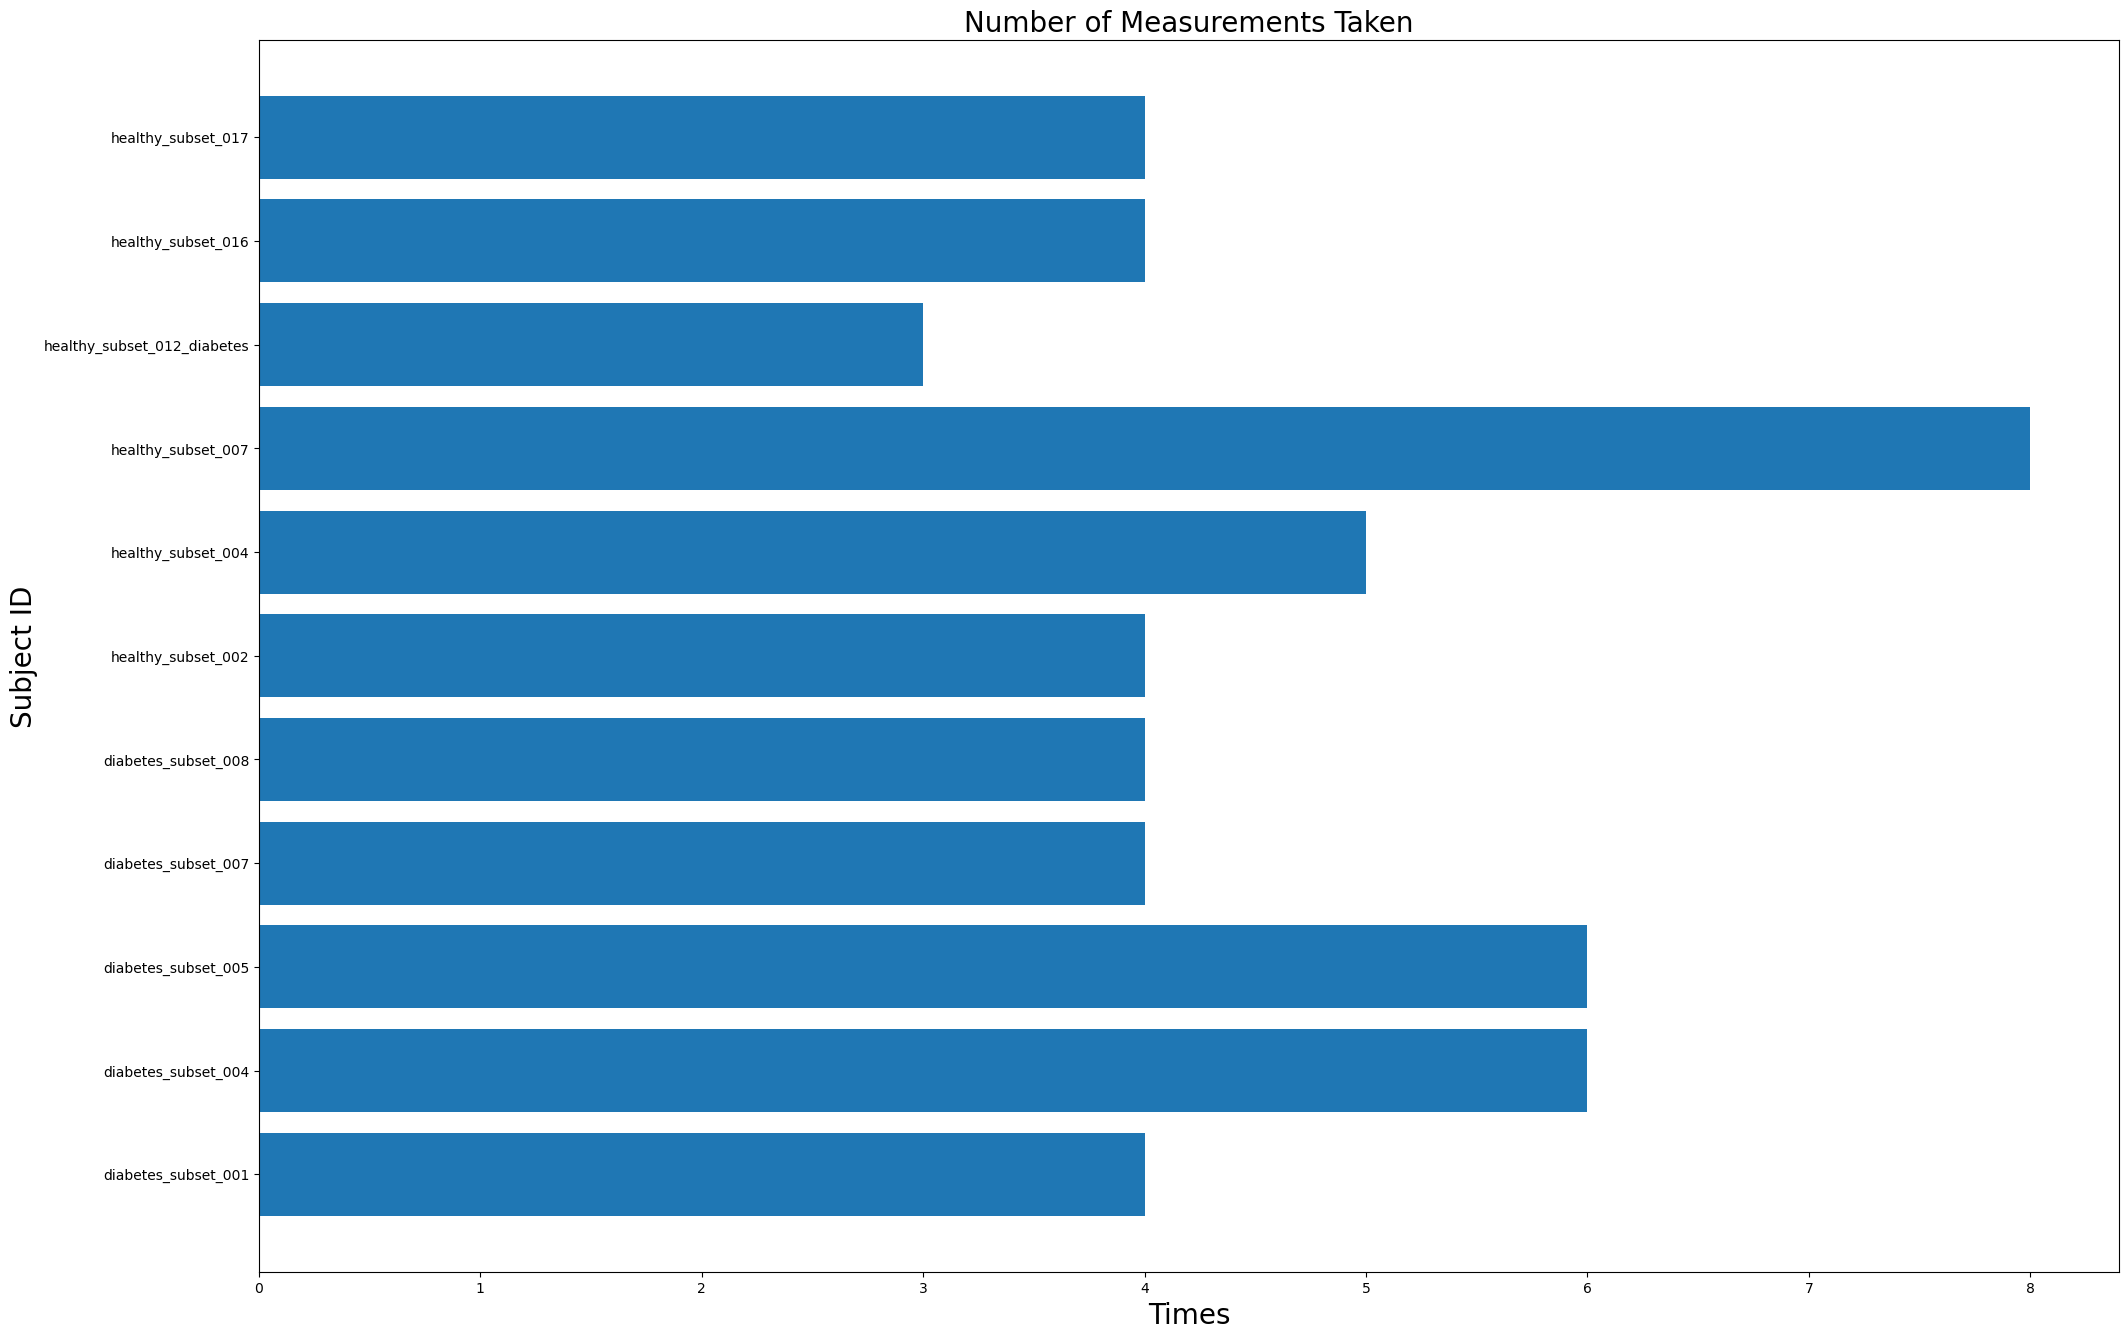

In [13]:
plot_subjects(subject_stats_df.groupby(["subjectID"]).count(),"total_time(hours)", "Number of Measurements Taken", "Times")

From the plot above I can see that some of subjects started the sensor multiple times a day.

I will try to investigate why these subjects have multiple readings a day due to different reasons.  
Such as:
1. Took sensor off for a period of time then put it back on.
2. Had the sensor on for an extensive period of time and dataset had to be split in two.
3. Faulty sensor.

C:\Users\PC\anaconda3\envs\CA4016\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


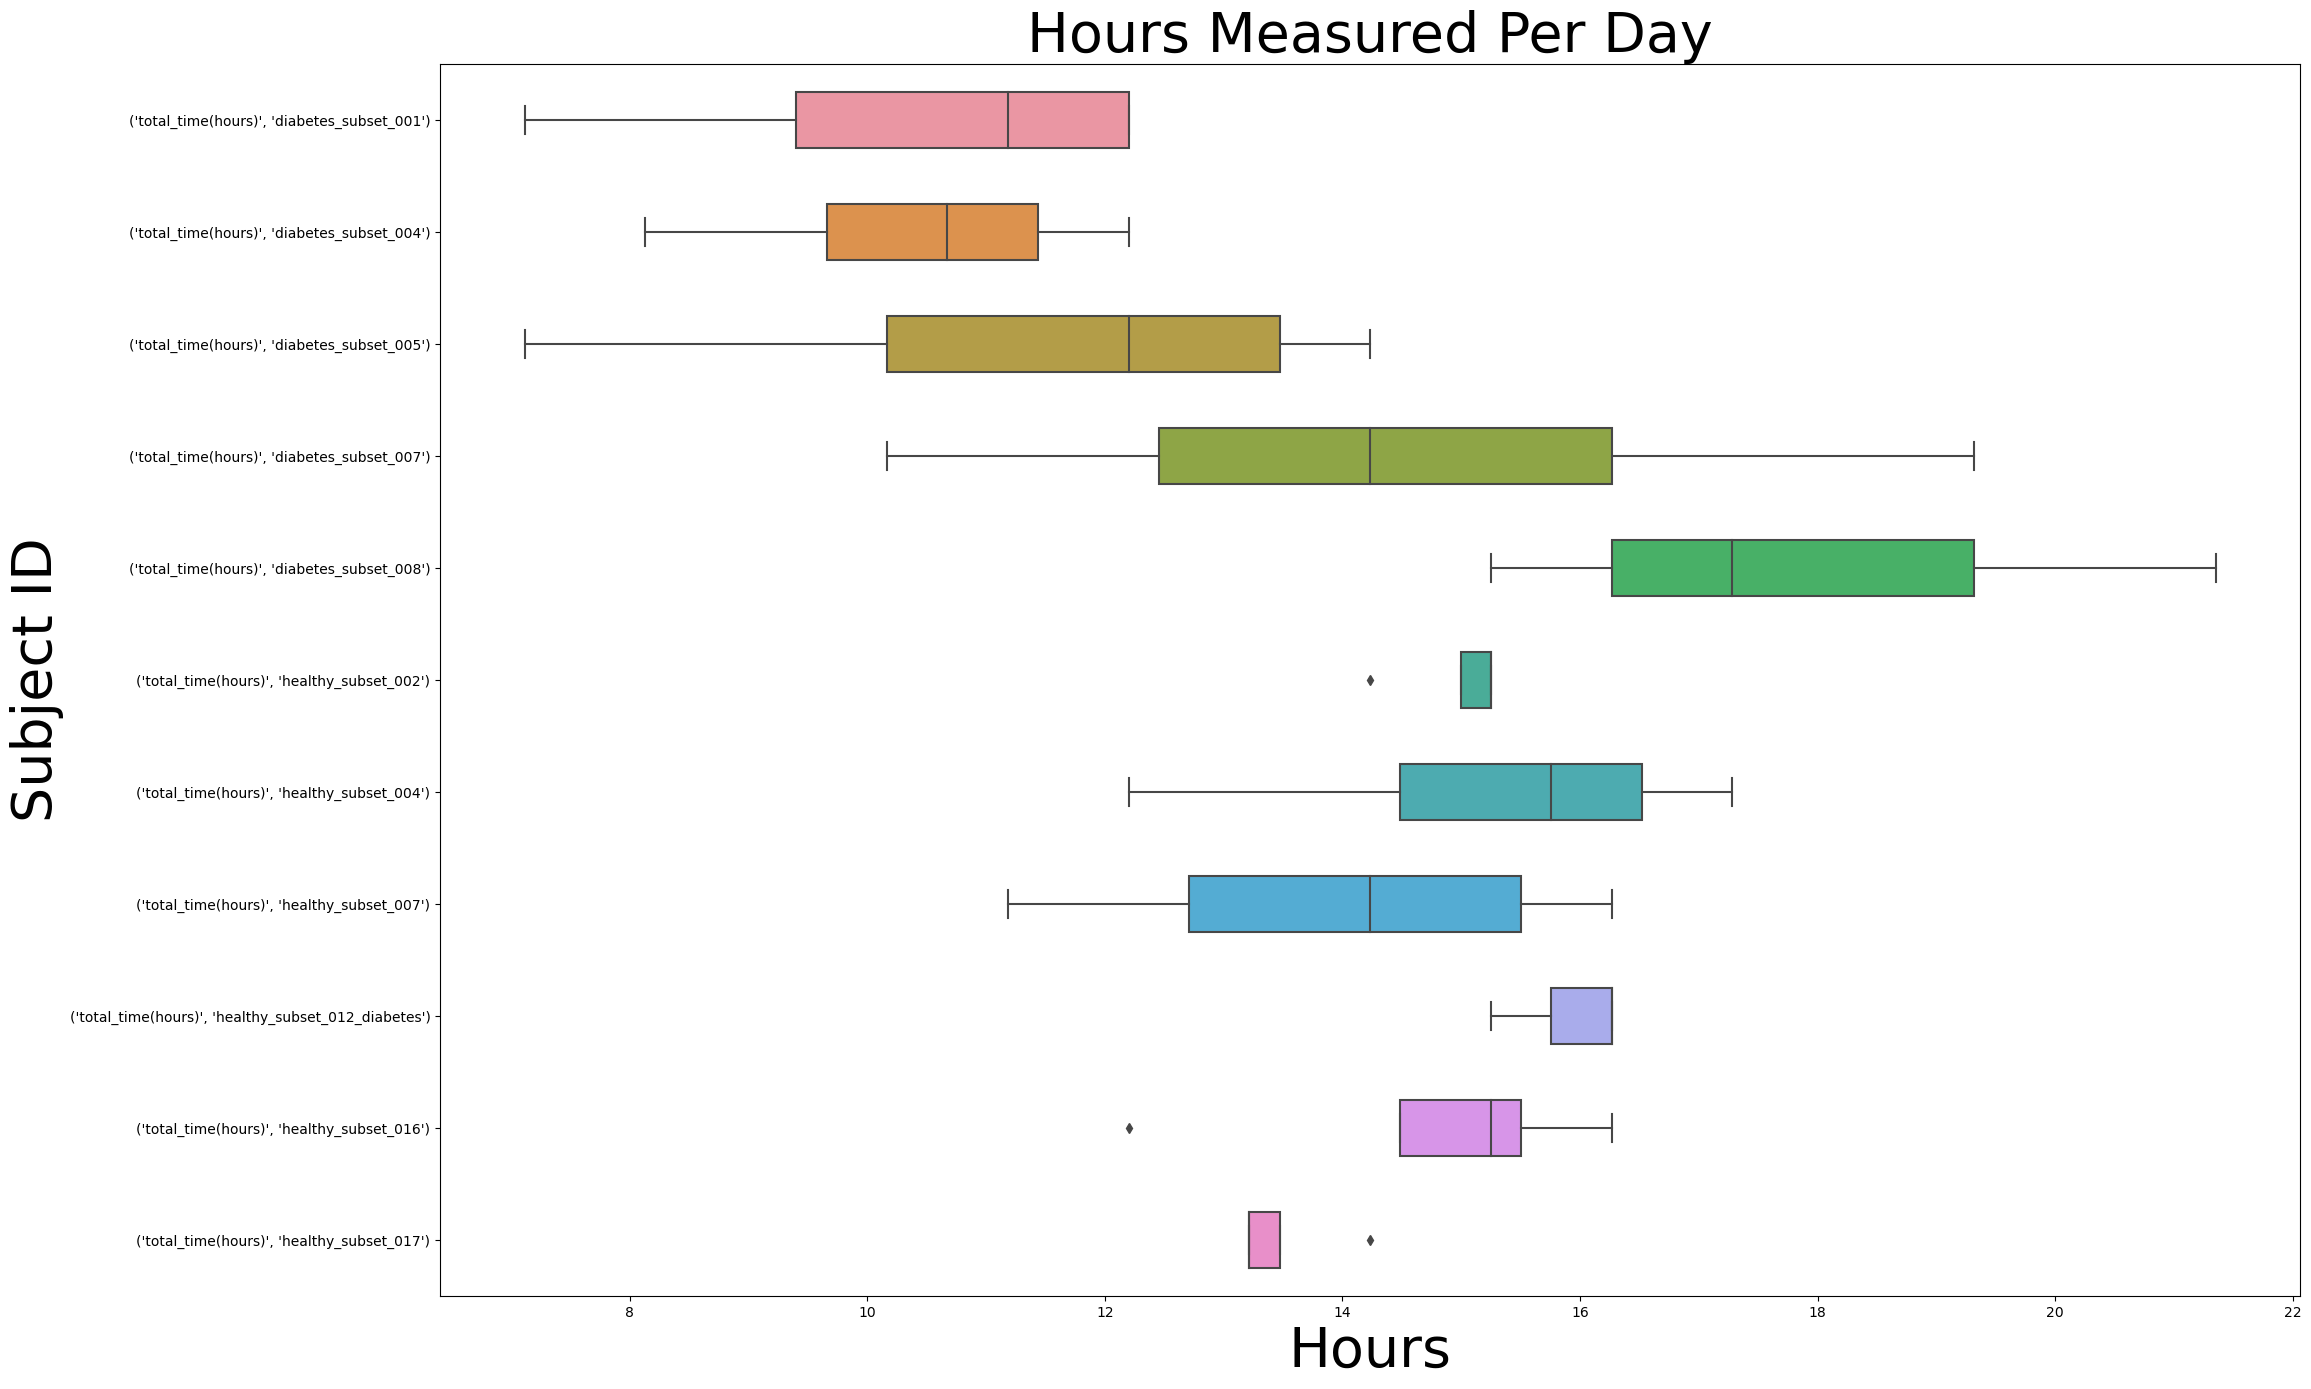

In [14]:
plot_boxplot(subject_stats_df.pivot_table(index=["date"], 
              columns=["subjectID"],values=["total_time(hours)"], aggfunc="sum"),"Hours Measured Per Day")

Key takeaways from the graph are:
1. On average the healthy subset was more consistant on the number of hours per day.
2. On average the healthy subset measured for more hours.


C:\Users\PC\anaconda3\envs\CA4016\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


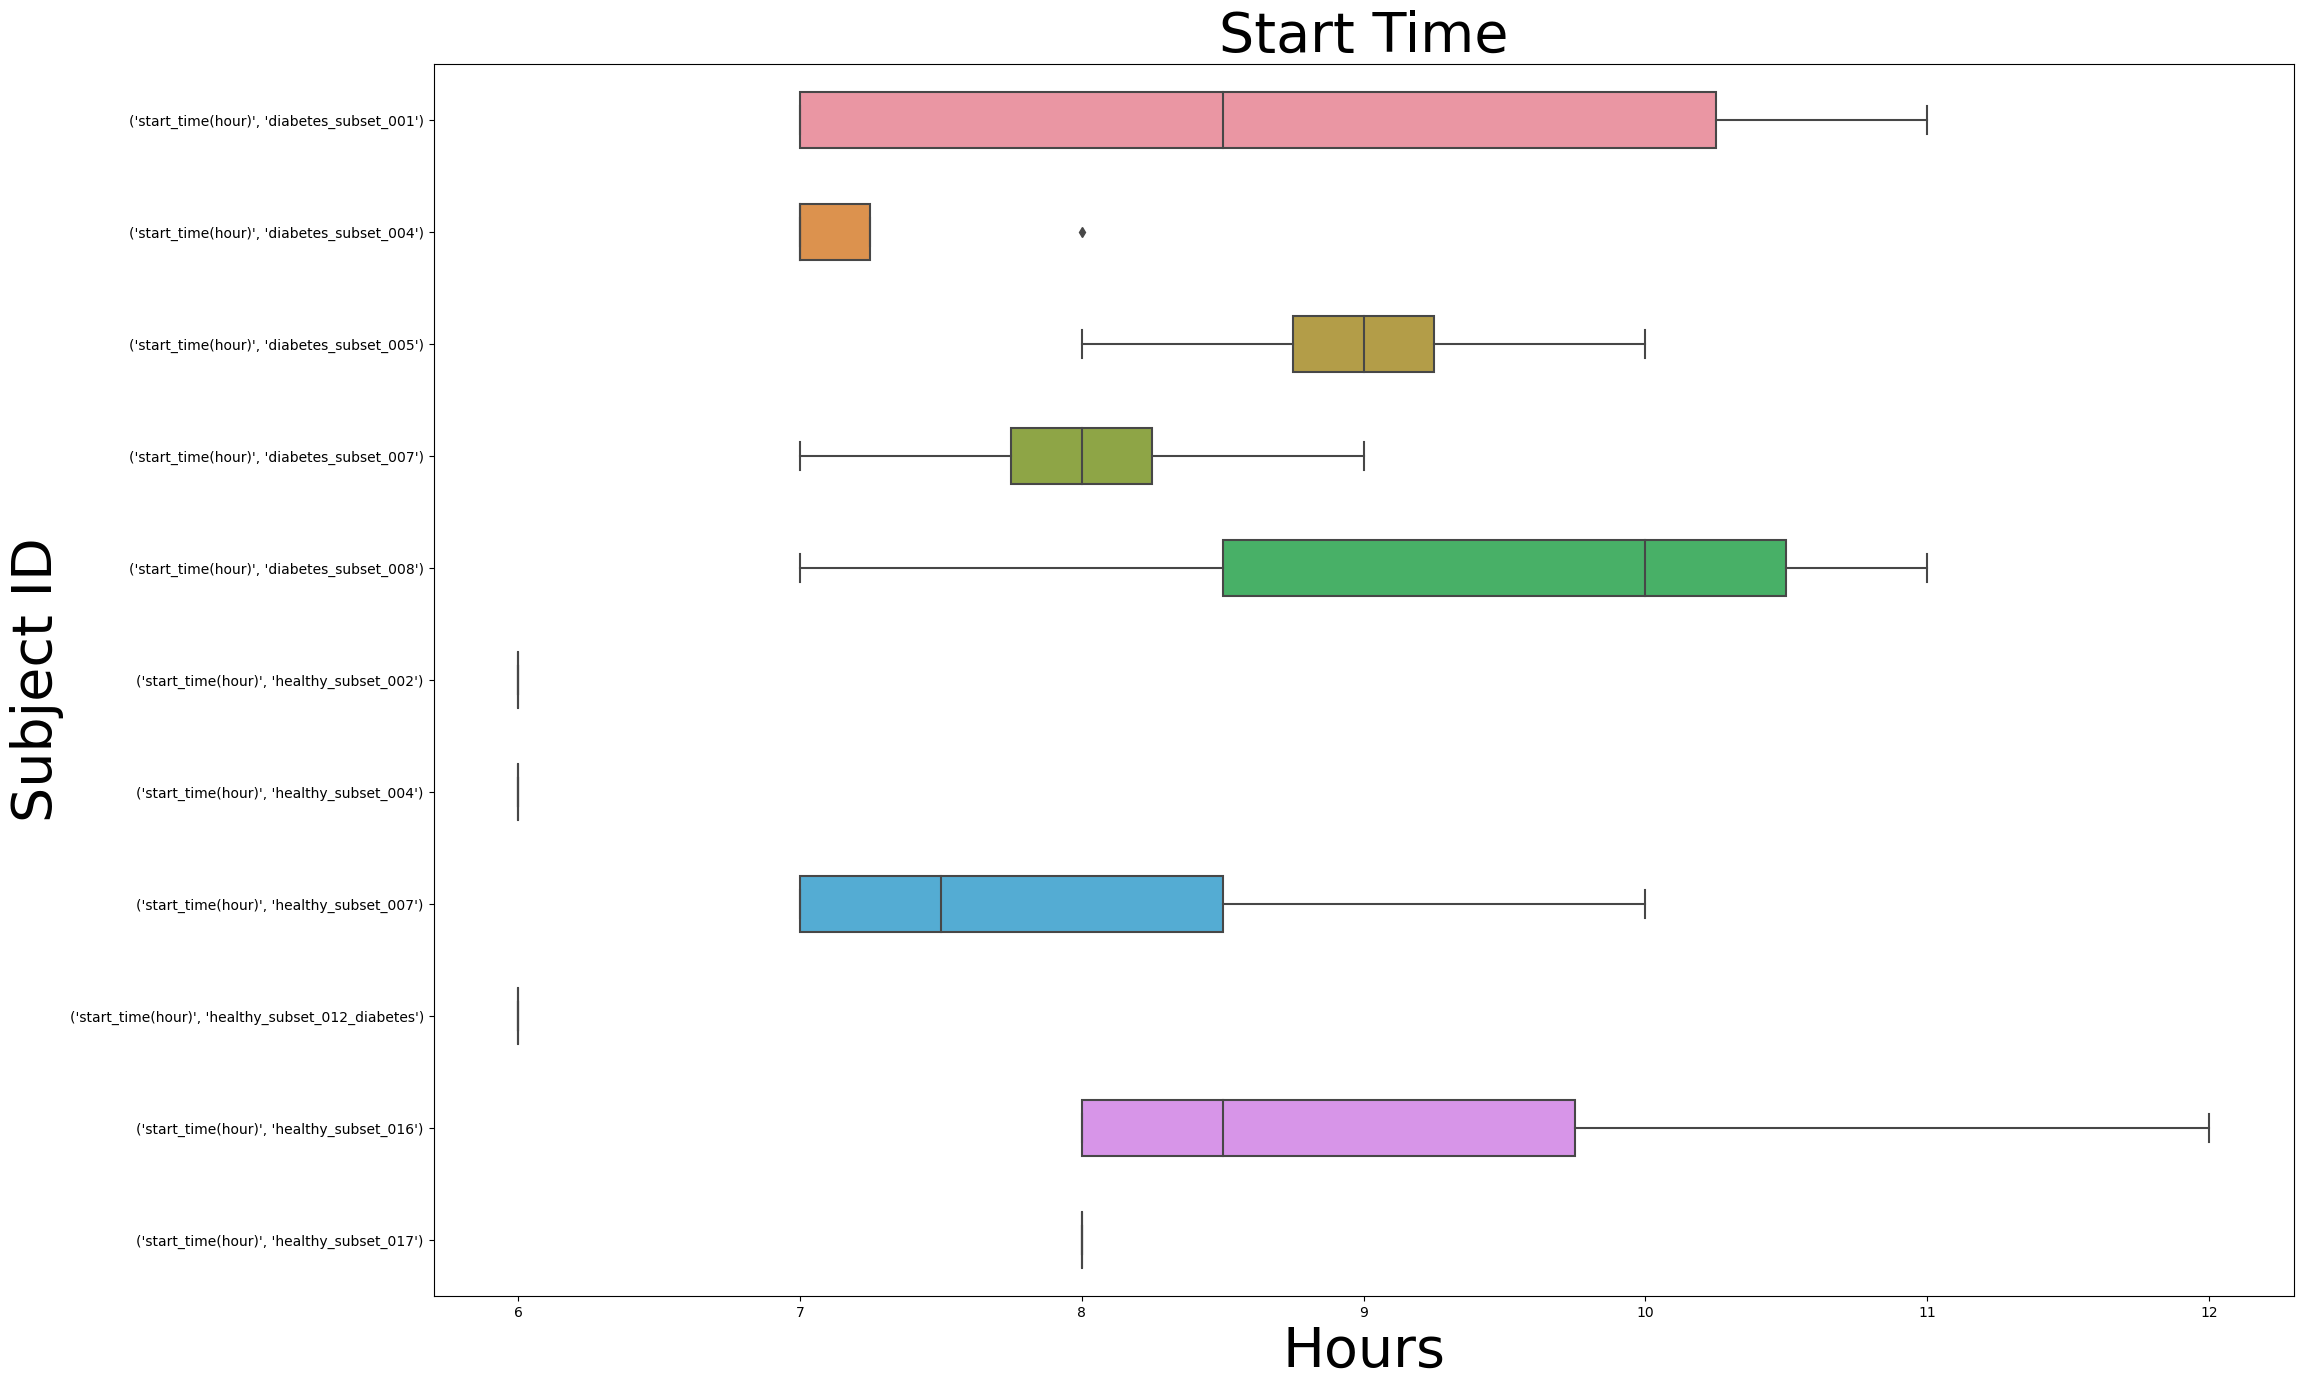

In [15]:
plot_boxplot(subject_stats_df.pivot_table(index=["date"], 
            columns=["subjectID"],values=["start_time(hour)"],aggfunc="first"),"Start Time")

C:\Users\PC\anaconda3\envs\CA4016\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


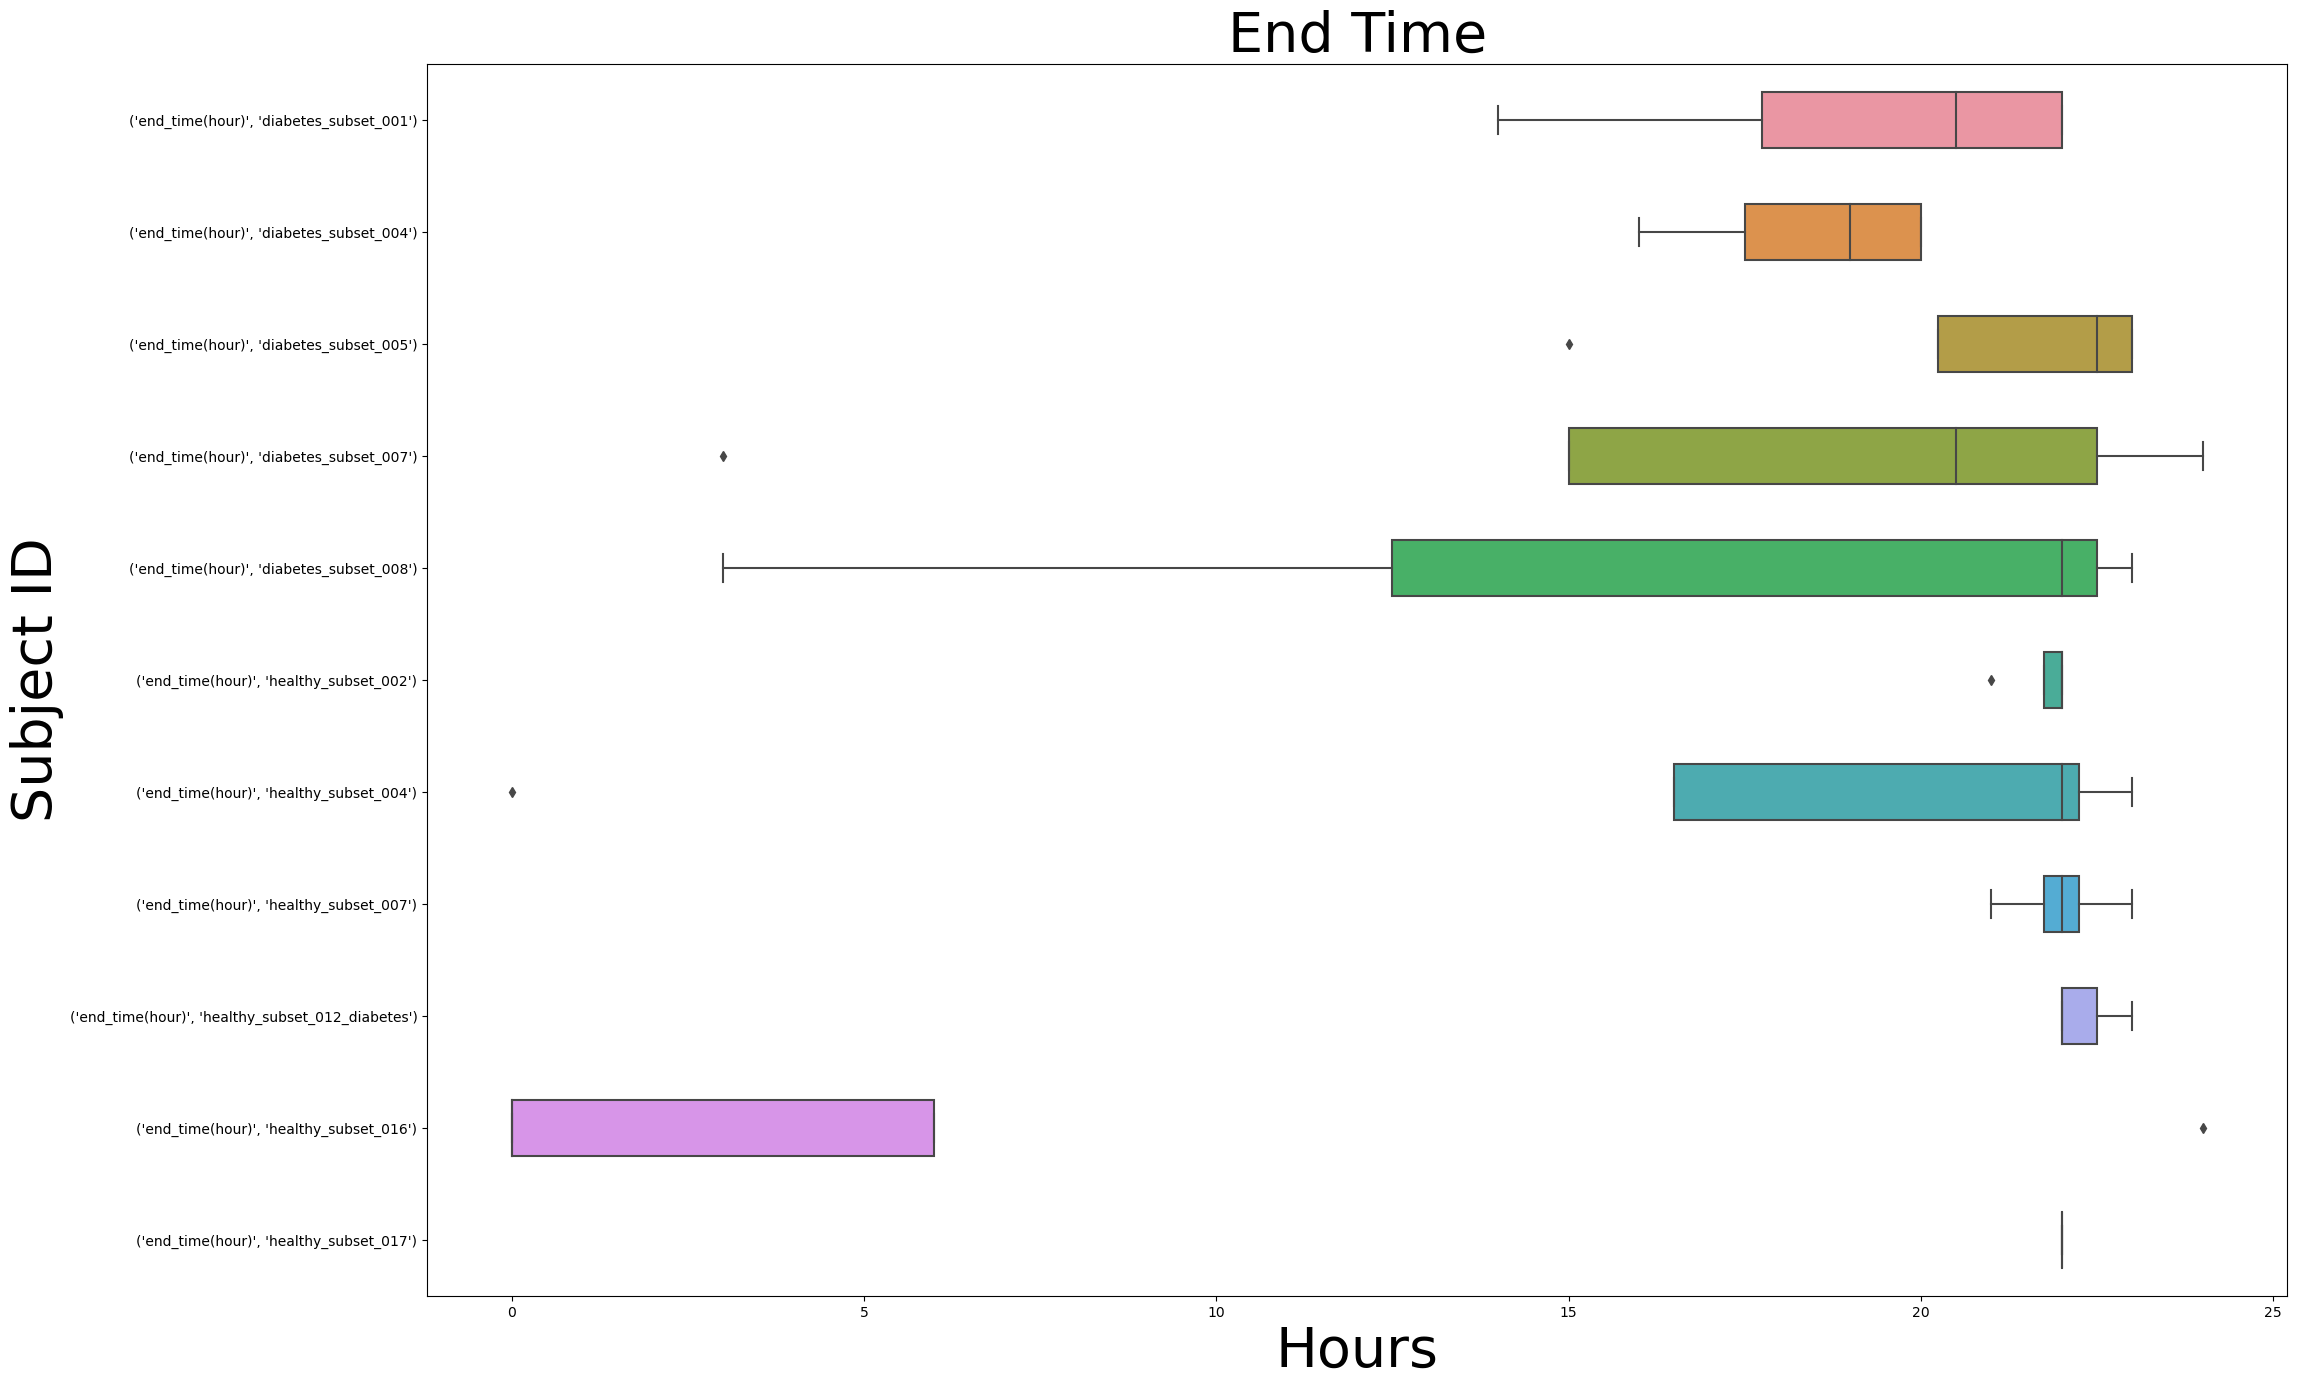

In [16]:
plot_boxplot(subject_stats_df.pivot_table(index=["date"], 
            columns=["subjectID"],values=["end_time(hour)"], aggfunc="max"),"End Time")

Once again there are few "healthy" subject who are extreamly consistant,  
I would assume the reason for this as the "healthy" subject are all research who have  
decided to take part on the study but I don't beleive that this is a fair representation   
on how the general public would participate.

In [17]:
column_stats = {}
ccc = 0
for key in dfs:
    dataset_count = 0
    count = 0

    columns_of_interest = []
    for day in dfs[key]:
        current_df = dfs[key][day].describe()
        for colName in current_df.columns[(current_df.loc["std"]==0).values]:
            columns_of_interest.append(colName)
            if colName in column_stats.keys():
                column_stats[colName].append(current_df[colName].loc["mean"])
            else:
                column_stats[colName] = [current_df[colName].loc["mean"]]
            count += 1
        dataset_count += 1
    #print(f"{key} had {count} total columns for {dataset_count} datasets")
    #print(f"The columns are {set(columns_of_interest)}")

In [18]:
col1 = list(column_stats.keys())[0]
column_stats_df = pd.DataFrame(column_stats[col1], columns=[col1]).describe()
for colName in list(column_stats.keys())[1:]:
    current_df = pd.DataFrame(column_stats[colName], columns=[colName]).describe()
    column_stats_df = column_stats_df.join(current_df,)
column_stats_df

,BRNoise,BRConfidence,GSR,LinkQuality,RSSI,TxPower,HRV,HRConfidence,SystemConfidence
count,52.0,52.0,52.0,52.0,52.0,52.0,10.0,1.0,1.0
mean,65535.0,255.0,65535.0,255.0,-128.0,-128.0,65535.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
min,65535.0,255.0,65535.0,255.0,-128.0,-128.0,65535.0,0.0,0.0
25%,65535.0,255.0,65535.0,255.0,-128.0,-128.0,65535.0,0.0,0.0
50%,65535.0,255.0,65535.0,255.0,-128.0,-128.0,65535.0,0.0,0.0
75%,65535.0,255.0,65535.0,255.0,-128.0,-128.0,65535.0,0.0,0.0
max,65535.0,255.0,65535.0,255.0,-128.0,-128.0,65535.0,0.0,0.0


The columns: "BRNoise","BRConfidence","GSR","LinkQuality","RSSI","TxPower"  
For all users have the same values throughout the datasets.  
For this reason I will drop these columns as they will add no insights when I try to classify them.

The two columns "SkinTemp" and "HRV" have a number of occasions where they equal one particular value through 
the datasets.  
I will explore them further and decide what steps to take.

The columns "HRConfidence" and "SystemConfidence" look like they may have been faulty and not taken any reading for one dataset each. 

In [19]:
cols = ["SkinTemp", "HRV"]
skin_hrv_df = pd.DataFrame(columns=["SkinTemp", "HRV"])
for key in dfs:
    for date_time in dfs[key]:
        day = date_time.split("-")[0]
        current_df = dfs[key][date_time][cols]
        skin_hrv_df = skin_hrv_df.append(current_df).reset_index(drop=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_13924\724235342.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skin_hrv_df = skin_hrv_df.append(current_df).reset_index(drop=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_13924\724235342.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skin_hrv_df = skin_hrv_df.append(current_df).reset_index(drop=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_13924\724235342.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skin_hrv_df = skin_hrv_df.append(current_df).reset_index(drop=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_13924\724235342.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skin

C:\Users\PC\AppData\Local\Temp\ipykernel_13924\724235342.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skin_hrv_df = skin_hrv_df.append(current_df).reset_index(drop=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_13924\724235342.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skin_hrv_df = skin_hrv_df.append(current_df).reset_index(drop=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_13924\724235342.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skin_hrv_df = skin_hrv_df.append(current_df).reset_index(drop=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_13924\724235342.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skin

C:\Users\PC\anaconda3\envs\CA4016\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


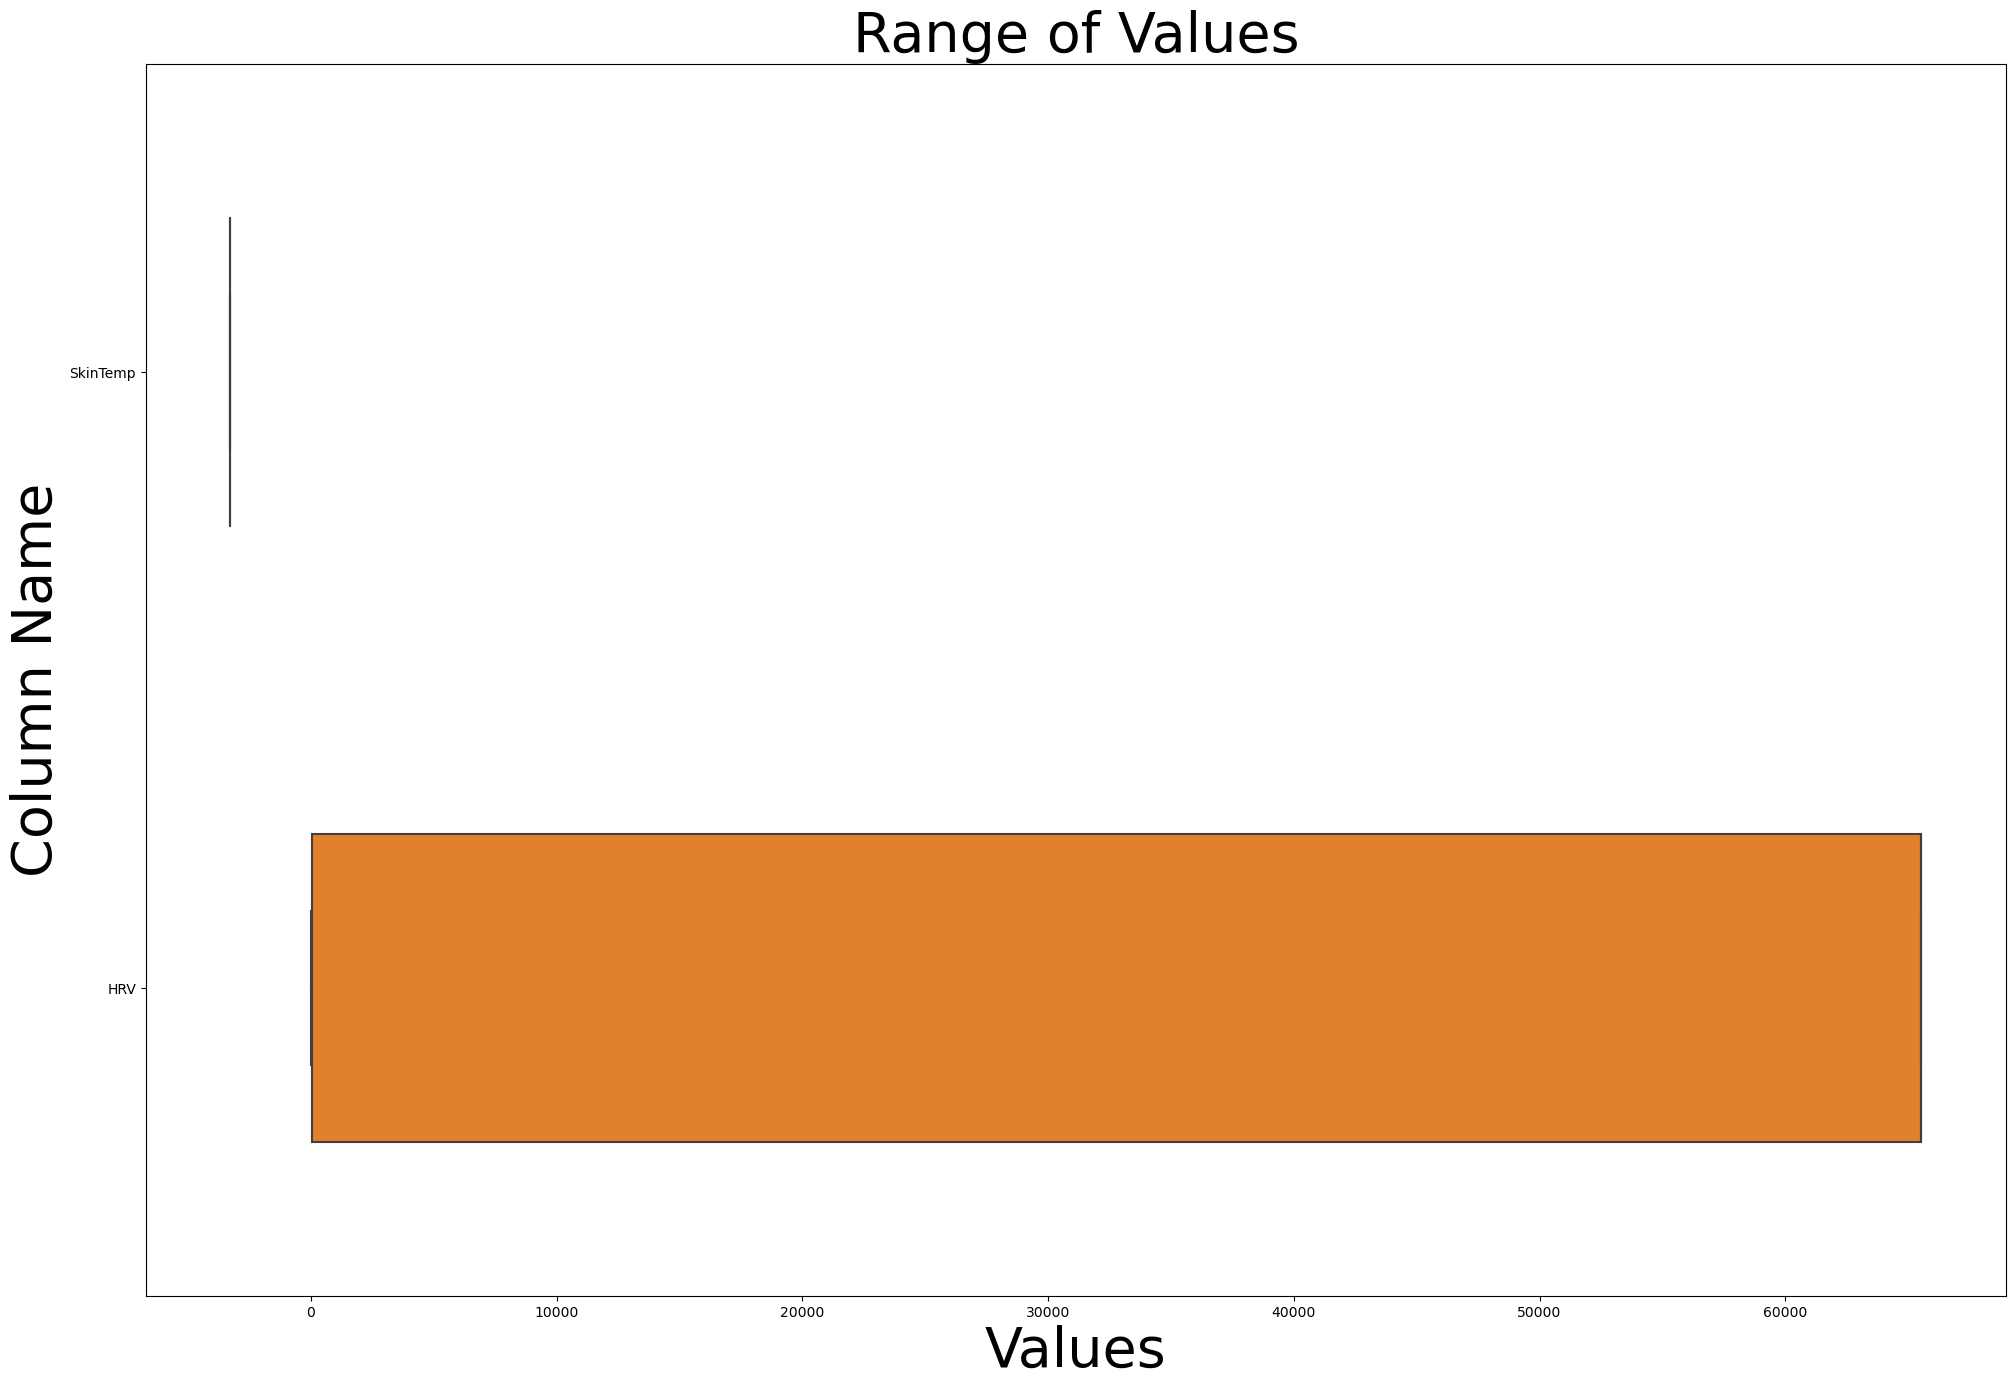

In [20]:
plot_boxplot(skin_hrv_df,"Range of Values", ylabel ="Column Name", xlabel = "Values")

In [21]:
skin_hrv_df.describe().astype(int)

,SkinTemp
count,2132859
mean,-3276
std,0
min,-3276
25%,-3276
50%,-3276
75%,-3276
max,-3276


SkinTemp seems to only be the value of -3276 throughout the dataset.   
I suspect that there may an error somewhere and thats why I didn't catch it with the other columns earlier.

Oddly enough the HRV column doesn't return anything when I use describe. 

In [22]:
skin_hrv_df[["HRV"]].describe().astype(int)

,HRV
count,2132859
unique,224
top,65535
freq,1225723


In [23]:
hrv_median, hrv_mean, hrv_mode = np.median(skin_hrv_df["HRV"]), np.mean(skin_hrv_df["HRV"]), skin_hrv_df["HRV"].mode()[0]
print(f"The median:{hrv_median} mean:{hrv_mean} mode:{hrv_mode}")

The median:65535.0 mean:37684.968754615285 mode:65535


It is clear that most values for hrv are equal to 65535.  
By looking at the median and mode it is obvious that at least 50% of values are.

In [24]:
sum(skin_hrv_df["HRV"] != 65535)/len(skin_hrv_df), sum(skin_hrv_df["HRV"] == 65535)/len(skin_hrv_df)

(0.42531456603554196, 0.574685433964458)

In [25]:
skin_hrv_df[["HRV"]].dropna()

,HRV
0,65535
1,65535
2,65535
3,65535
4,65535
...,...
2132854,65535
2132855,65535
2132856,65535
2132857,65535


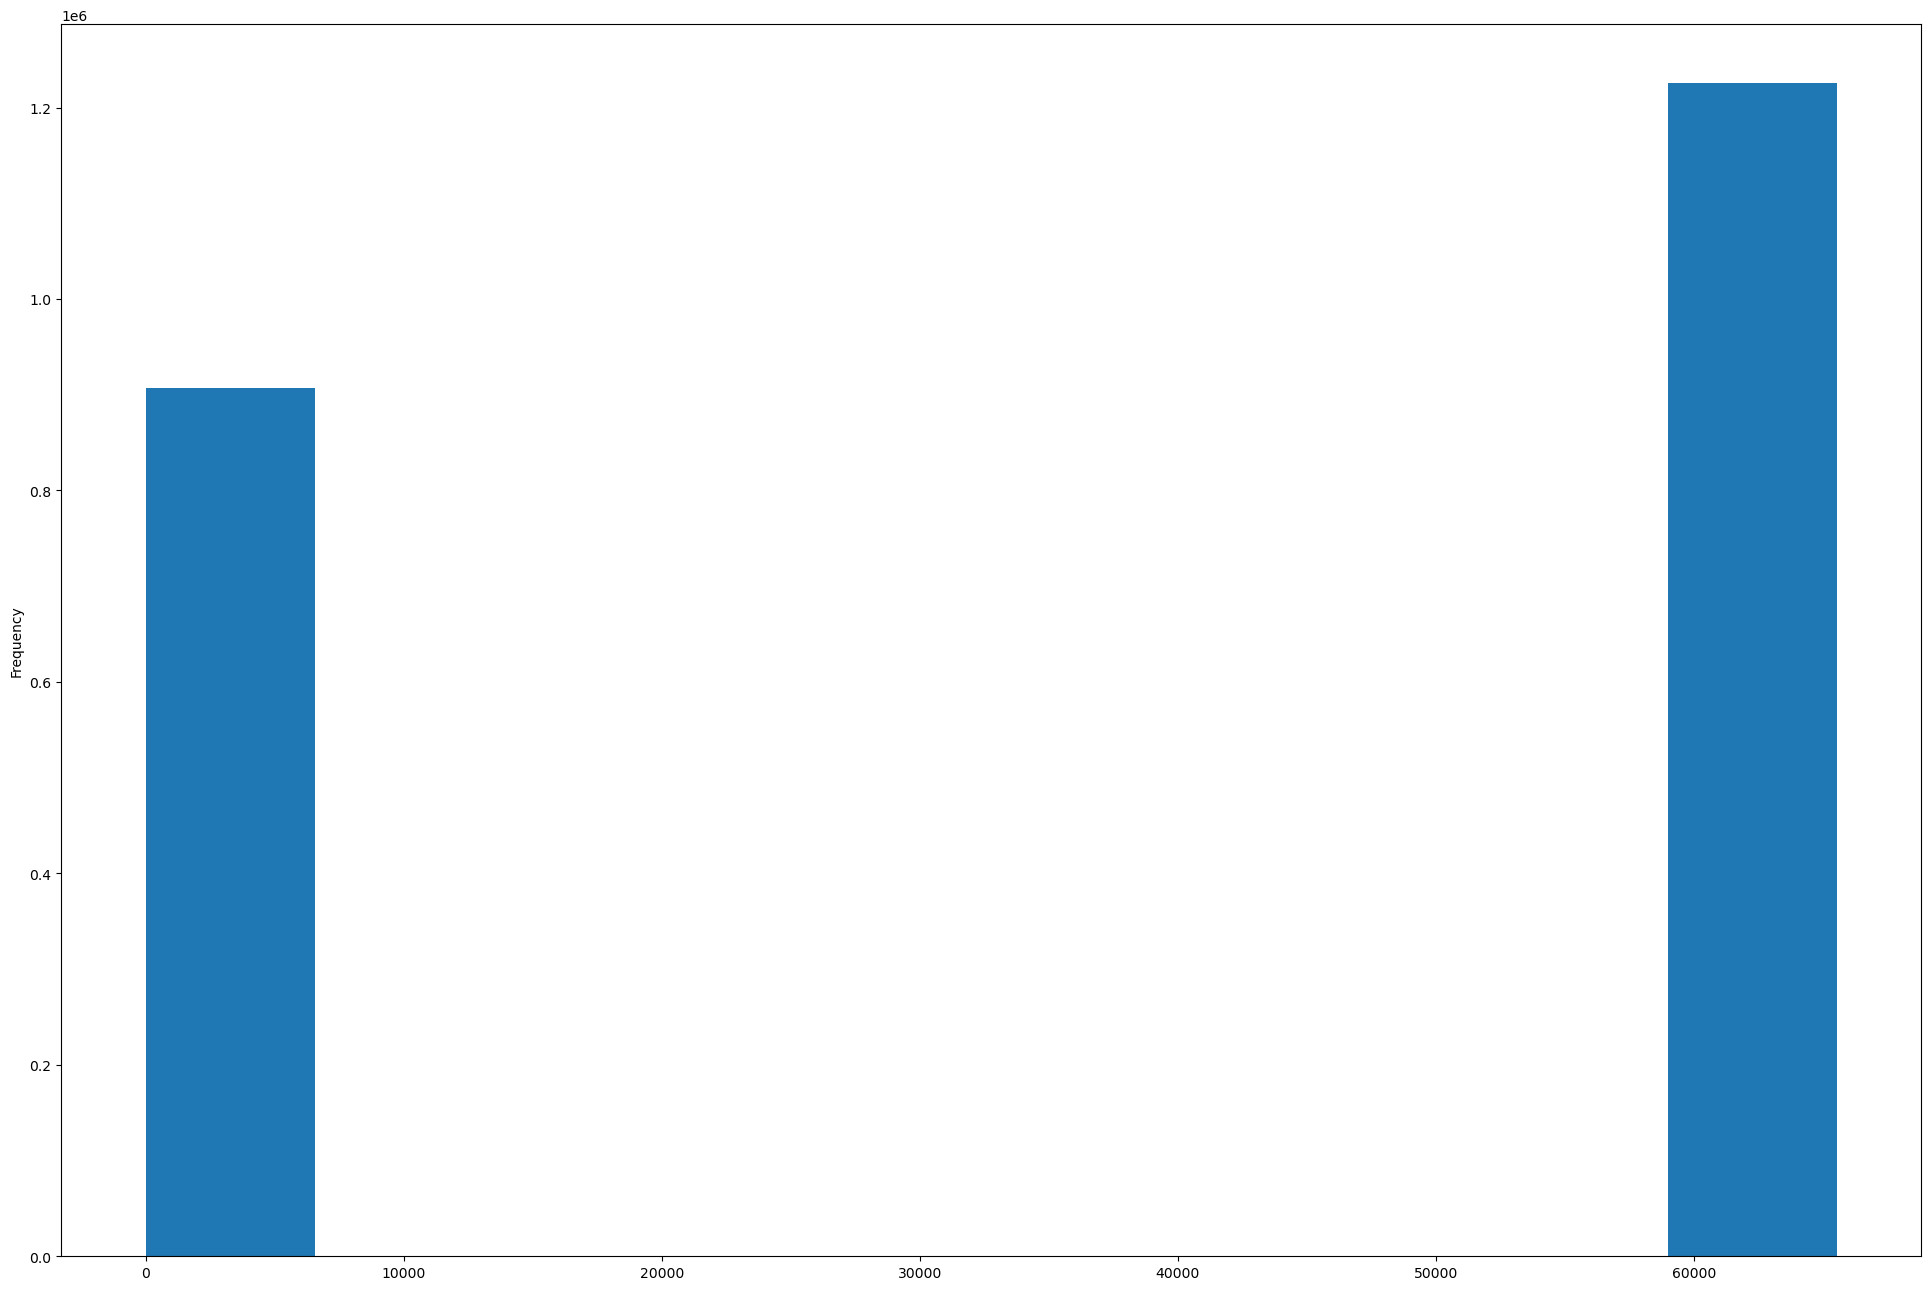

In [26]:
skin_hrv_df["HRV"].plot(kind="hist");

<AxesSubplot:ylabel='Frequency'>

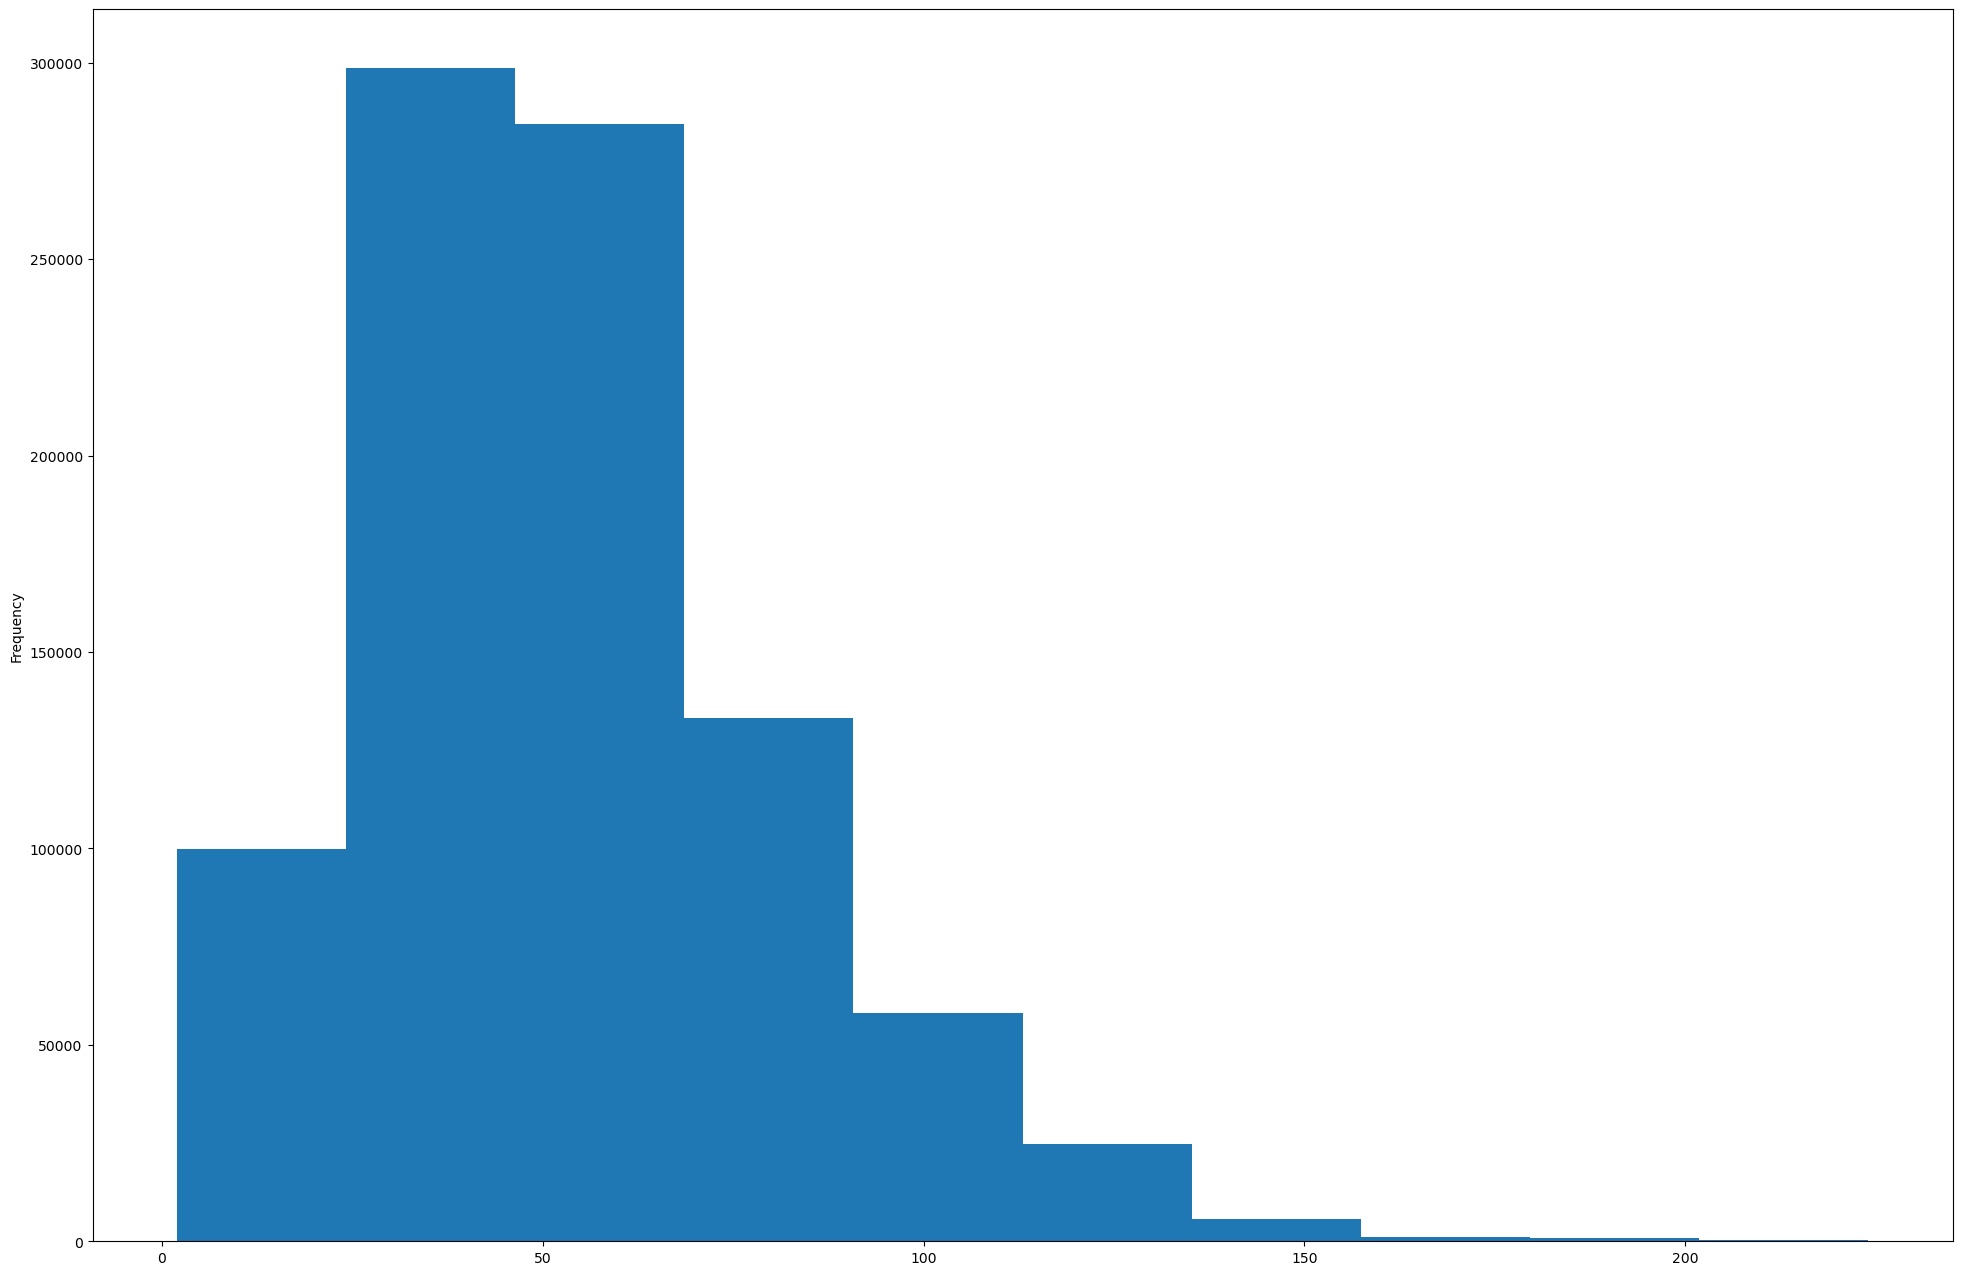

In [27]:
skin_hrv_df["HRV"][skin_hrv_df["HRV"] != 65535].plot(kind="hist")

In [28]:
dfs["healthy_subset_004"]["2014_10_04-06_17_01"][["HRV"]].describe()

,HRV
count,63993.000000
mean,40800.686106
std,31744.917392
min,17.000000
25%,62.000000
50%,65535.000000
75%,65535.000000
max,65535.000000


<AxesSubplot:xlabel='Time'>

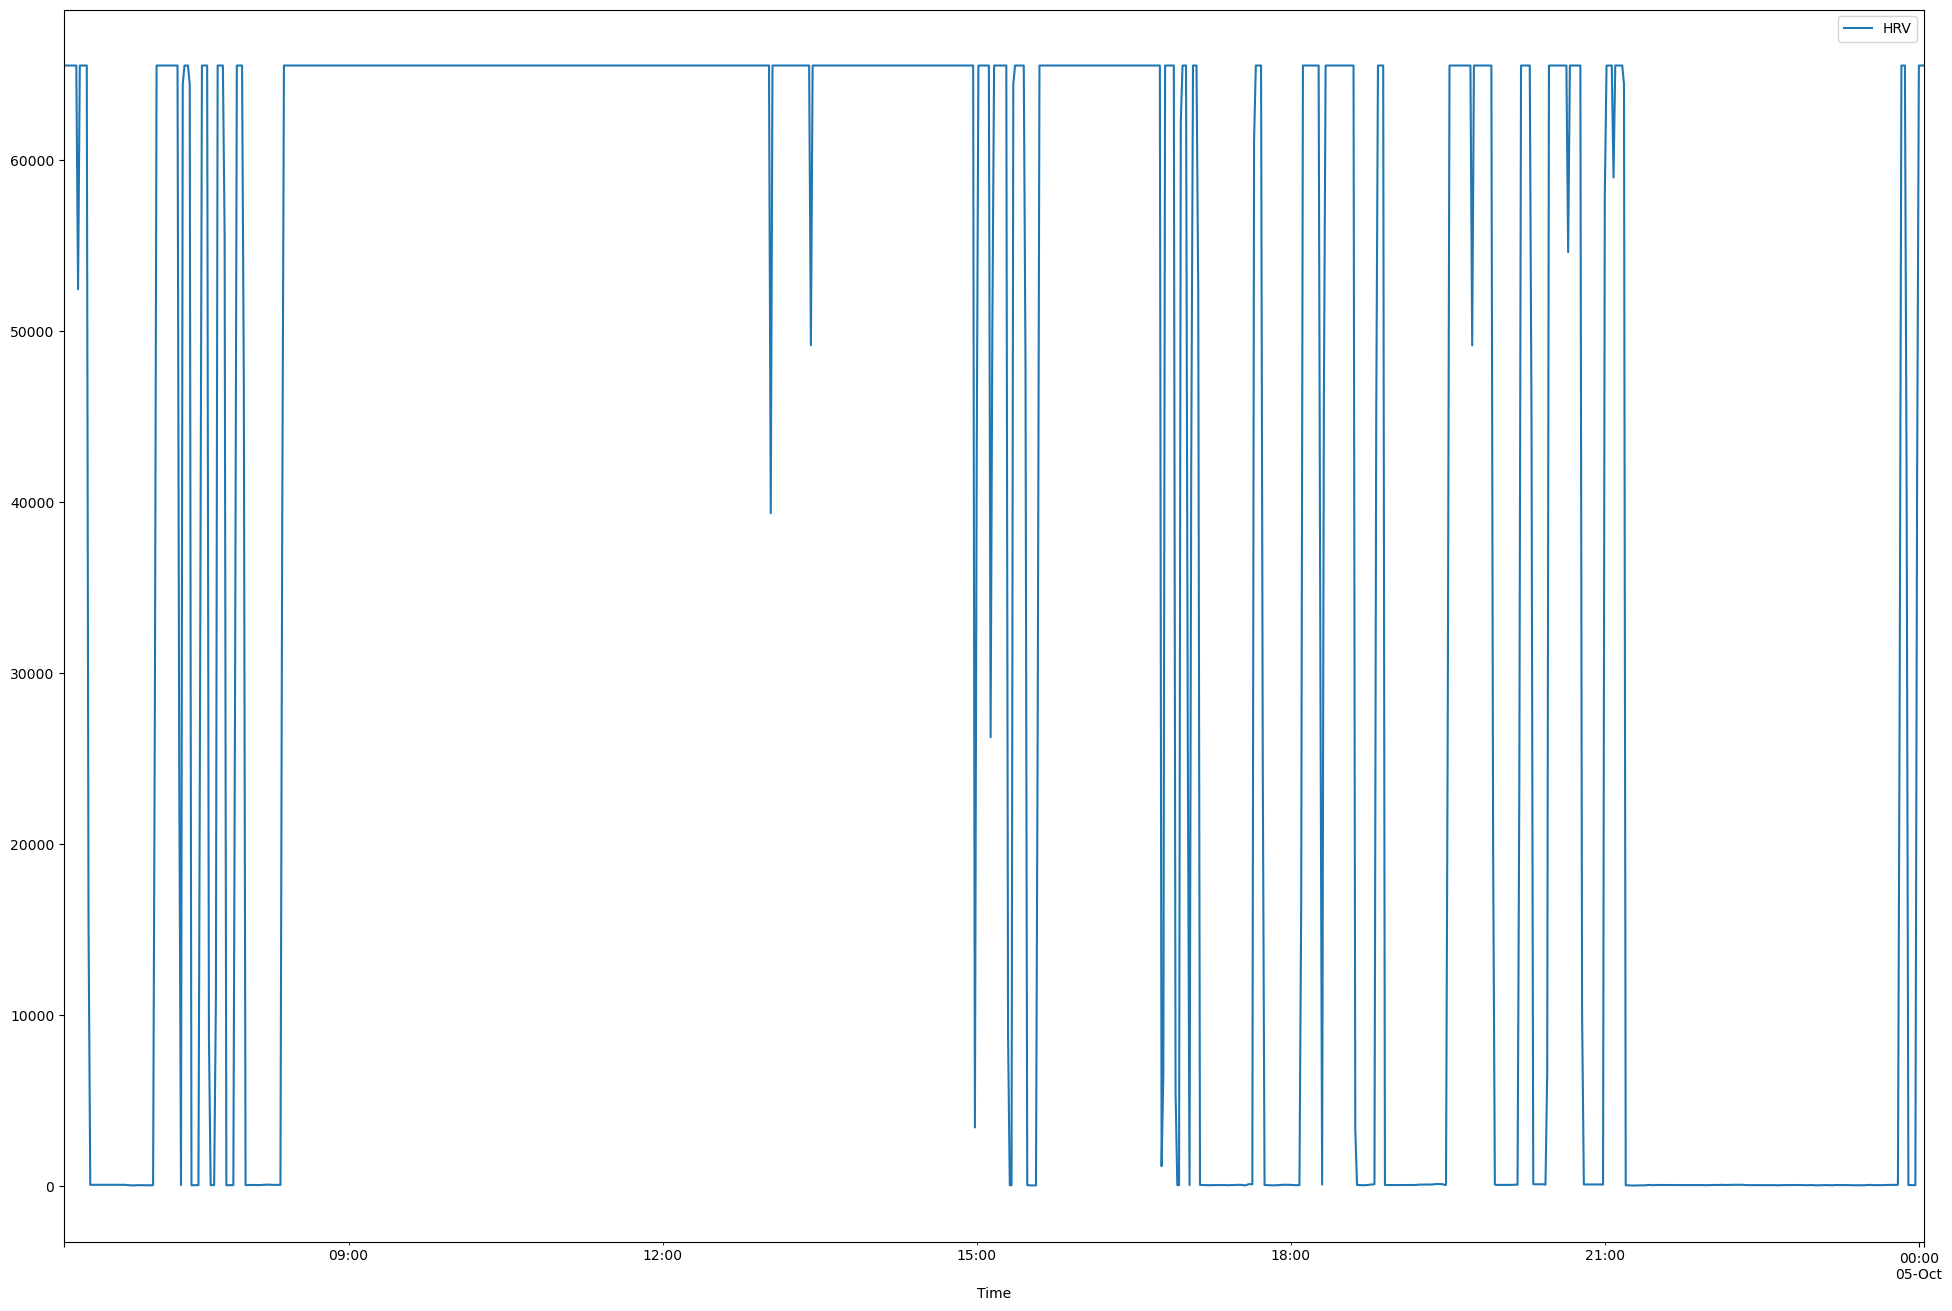

In [29]:
dfs["healthy_subset_004"]["2014_10_04-06_17_01"][["Time","HRV"]].set_index("Time").resample("t").mean().plot()

Some subjects such as healthy_subset_004 included extra data in the annotation file where they describe different activites the did while wearing the sensor.

According to the file the subject was dancing at 21:15.

I believe the feature HRV to stand for heart rate variability, it would make sense that the value would change while/after doing exersise.

I will investigate other subjects.

cat healthy_subset_007 annotaions.csv

2014-10-01,09:00,2014-10-01,10:00,activity,"Motorbike"  
2014-10-02,12:00,2014-10-02,12:30,sport,"Running"  
2014-10-03,15:00,2014-10-03,16:00,sport,"Climbing" 

In [30]:
dfs["healthy_subset_007"].keys()

dict_keys(['2014_10_02-06_32_36', '2014_10_02-13_10_03', '2014_10_03-06_43_59', '2014_10_03-21_18_12', '2014_10_03-21_45_56', '2014_10_04-08_08_25', '2014_10_04-21_44_52', '2014_10_05-10_23_50'])

Oddly enough it looks like this subject either started a day later and ended a day later or their data is labled wrong.

I will explore another subject just incase.

By looking at 

In [31]:
dfs.keys()

dict_keys(['diabetes_subset_001', 'diabetes_subset_004', 'diabetes_subset_005', 'diabetes_subset_007', 'diabetes_subset_008', 'healthy_subset_002', 'healthy_subset_004', 'healthy_subset_007', 'healthy_subset_012_diabetes', 'healthy_subset_016', 'healthy_subset_017'])

cat healthy_subset_016 annotaions.csv

2014-10-01,21:50,2014-10-01,22:00,sport,Exercise  
2014-10-01,09:10,2014-10-01,09:20,sport,Exercise 


This subject is did two short 10 minute periods of exercise, I will check if there is an interesting change to HRV
during this time.

In [32]:
dfs["healthy_subset_016"]["2014_10_01-12_07_54"][["HRV"]].describe()

,HRV
count,43313.0
mean,65535.0
std,0.0
min,65535.0
25%,65535.0
50%,65535.0
75%,65535.0
max,65535.0


Though the subject did 20 minutes of exercise there is no change of the HRV value throughout the day.



In [33]:
drop_columns = ["BRNoise","BRConfidence","GSR","LinkQuality","RSSI","TxPower", "SkinTemp"]
for subject in dfs:
    for day in dfs[subject]:
        dfs[subject][day] = dfs[subject][day].drop(columns=drop_columns) 

In [34]:
dfs[subject][day].columns

Index(['Time', 'HR', 'BR', 'Posture', 'Activity', 'PeakAccel', 'BatteryVolts',
       'BatteryLevel', 'BRAmplitude', 'ECGAmplitude', 'ECGNoise',
       'HRConfidence', 'HRV', 'SystemConfidence', 'ROGState', 'ROGTime',
       'VerticalMin', 'VerticalPeak', 'LateralMin', 'LateralPeak',
       'SagittalMin', 'SagittalPeak', 'DeviceTemp', 'StatusInfo', 'CoreTemp',
       'AuxADC1', 'AuxADC2', 'AuxADC3'],
      dtype='object')